<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1">Overview</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-2">Data Loading</a></span><ul class="toc-item"><li><span><a href="#Importing-of-title.ratings-dataset" data-toc-modified-id="Importing-of-title.ratings-dataset-2.1">Importing of title.ratings dataset</a></span></li><li><span><a href="#Importing-of-title.basics-dataset" data-toc-modified-id="Importing-of-title.basics-dataset-2.2">Importing of title.basics dataset</a></span></li><li><span><a href="#Final-dataset:-Join-of-two-dataframes" data-toc-modified-id="Final-dataset:-Join-of-two-dataframes-2.3">Final dataset: Join of two dataframes</a></span></li></ul></li><li><span><a href="#Clustering-with-K-Mean-algorithm" data-toc-modified-id="Clustering-with-K-Mean-algorithm-3">Clustering with K-Mean algorithm</a></span><ul class="toc-item"><li><span><a href="#Plot-the-final-joined-dataset" data-toc-modified-id="Plot-the-final-joined-dataset-3.1">Plot the final joined dataset</a></span></li><li><span><a href="#Clustering-with-K-Means" data-toc-modified-id="Clustering-with-K-Means-3.2">Clustering with K-Means</a></span></li></ul></li><li><span><a href="#Export-results-of-K-Means-clustering" data-toc-modified-id="Export-results-of-K-Means-clustering-4">Export results of K-Means clustering</a></span></li></ul></div>

# Overview
This .pynb concludes the project "<b>The Last 10 Years of Movie & TV Series</b>" that can be found here:

> <b>Medium Link</b>: https://medium.com/@umbertodicanito/the-last-10-years-of-movies-tv-series-ef9c6d5332b9

The idea behind the project is to analyze the production of entertainment content in the form of Movies and TV Series in the last decade (2012-2021). Following, the main characteristics of the project:

> <b>Dataset</b>: https://datasets.imdbws.com/ (last update: 31/07/2021) <br>
<b>Color Theme</b>: #06f984, #fde802, #ff911a, #fc5d02, #ff00f9 <br>
<b>Fonts</b>: Bahnschrift SemiBold, Bahnschrift

The goal behind this .pynb work is to clusterize the titles of the top 100 most voted shows in the period 2012-2021, having as attributes the number and the average of the votes, represented by the unique identifier of the titles of the shows (`tconst`). In order to do this, the <b>K-Means</b> algorithm was chosen.
<br>
This algorithm is probably one of the simplest and popular unsupervised machine learning algorithms. Its goal is the same of the problem that is needed to solve here; in fact, citing Wikipedia (https://en.wikipedia.org/wiki/K-means_clustering): 
> "<i>k-means clustering is a method that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.</i>"

Going into details, the pseudocode workflow of the algorithm is the following:

>`1|  Choose k number of clusters
 2| Select k random points from the data as centroids 
 3| Assign all the points to the closest cluster centroid 
 4| Recompute the centroids of newly formed clusters 
 5| Repeat steps 3 and 4 a number of times arbitrary in order to reach the convergence` 


<br>
From the implementation point of view we chose to use the <b>Scikit Learn</b> (https://scikit-learn.org) one of the best open source libraries for machine learning. Now, let's start with the code.

# Data Loading
first of all let's import the libraries that will be used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

## Importing of title.ratings dataset
It contains the list of unique title IDs (`tconst`) with AVG rating (`averageRating`) and # of votes (`numVotes`).

In [2]:
path_title_ratings = 'D:\\Documenti\\Umberto\\Lavoro\\Corsi e Certificazioni\\Corsi\\~Progetti\\The Last 10 Years of Movie & TV Series\\txt_dataset\\title.ratings.txt'
title_ratings = pd.read_csv(path_title_ratings, delimiter = "\t")
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1757
1,tt0000002,6.0,222
2,tt0000003,6.5,1513
3,tt0000004,6.1,143
4,tt0000005,6.2,2327
...,...,...,...
1173978,tt9916682,5.6,5
1173979,tt9916690,6.6,5
1173980,tt9916720,5.5,116
1173981,tt9916766,6.9,18


## Importing of title.basics dataset
It contains general informations about the titles. It is needed to obtain the attribute of `startYear` of unique IDs of titles, in order to join the two datasets. All the other columns of this dataset are deleted.

In [3]:
path_title_basics = 'D:\\Documenti\\Umberto\\Lavoro\\Corsi e Certificazioni\\Corsi\\~Progetti\\The Last 10 Years of Movie & TV Series\\txt_dataset\\title.basics.txt'
title_basics = pd.read_csv(path_title_basics, delimiter = "\t")
title_basics

C:\Users\Utente\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8133397,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8133398,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8133399,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8133400,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [4]:
# maintain only the needed columns
title_basics = title_basics.drop(['titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'endYear', 'runtimeMinutes', 'genres'], axis=1)
title_basics

,tconst,startYear
0,tt0000001,1894
1,tt0000002,1892
2,tt0000003,1892
3,tt0000004,1892
4,tt0000005,1893
...,...,...
8133397,tt9916848,2010
8133398,tt9916850,2010
8133399,tt9916852,2010
8133400,tt9916856,2015


In [5]:
# changing the dtype of 'startYear' column in order to filter and replacing null values in dataset ('\N') with 0.
title_basics=title_basics.replace('\\N', '0')
title_basics["startYear"] = pd.to_numeric(title_basics["startYear"])
title_basics.dtypes

tconst       object
startYear     int64
dtype: object

In [6]:
# removing the titles having startYear column <2012 
index_filtered_by_2012 = title_basics[ title_basics['startYear'] < 2012 ].index
title_basics.drop(index_filtered_by_2012, inplace = True)

In [7]:
# removing the titles having startYear column >2021
index_filtered_by_2021 = title_basics[ title_basics['startYear'] > 2021 ].index
title_basics.drop(index_filtered_by_2021, inplace = True)

In [8]:
# the dataset filtered ready to be joined
title_basics

,tconst,startYear
11059,tt0011216,2019
11636,tt0011801,2019
16657,tt0016906,2014
55766,tt0056840,2021
59217,tt0060366,2020
...,...,...
8133375,tt9916802,2019
8133379,tt9916810,2019
8133393,tt9916840,2014
8133400,tt9916856,2015


## Final dataset: Join of two dataframes
In order to obtain the final output that will be used to make the analysis with `K-Mean algorithm`, it is needed join the two datasets.

In [9]:
final_dataset = pd.merge(title_basics, title_ratings, how="inner", on="tconst")
final_dataset

,tconst,startYear,averageRating,numVotes
0,tt0011216,2019,6.9,24
1,tt0016906,2014,5.6,16
2,tt0056840,2021,6.9,90
3,tt0062336,2020,6.3,143
4,tt0065047,2014,7.0,154
...,...,...,...,...
462295,tt9916682,2012,5.6,5
462296,tt9916690,2012,6.6,5
462297,tt9916720,2019,5.5,116
462298,tt9916766,2019,6.9,18


In [10]:
# check the dtypes of the dataframe
final_dataset.dtypes

tconst            object
startYear          int64
averageRating    float64
numVotes           int64
dtype: object

In [11]:
# some statistics about the joined dataframe
columnNumVotes = final_dataset["numVotes"]
max_columnNumVotes = columnNumVotes.max()
min_columnNumVotes = columnNumVotes.min()
avg_columnNumVotes = columnNumVotes.mean()
print("The min # of votes is: "+str(min_columnNumVotes))
print("The max # of votes is: "+str(max_columnNumVotes))
print("The avg # of votes is: "+str(avg_columnNumVotes))

The min # of votes is: 5
The max # of votes is: 1585393
The avg # of votes is: 829.0533917369673


In [12]:
# order by numVotes
final_dataset = final_dataset.sort_values(by=['numVotes'],ascending=False)
final_dataset

,tconst,startYear,averageRating,numVotes
235,tt0816692,2014,8.6,1585393
80624,tt1345836,2012,8.4,1559820
104346,tt1853728,2012,8.4,1405950
260,tt0848228,2012,8.0,1294398
331,tt0993846,2013,8.2,1242262
...,...,...,...,...
98199,tt14600112,2021,6.0,5
323575,tt6144504,2016,5.4,5
98211,tt14602150,2021,5.8,5
323560,tt6144370,2016,8.4,5


In [13]:
# keeping the 1000 most voted titles
final_dataset = final_dataset.head(100)
final_dataset

,tconst,startYear,averageRating,numVotes
235,tt0816692,2014,8.6,1585393
80624,tt1345836,2012,8.4,1559820
104346,tt1853728,2012,8.4,1405950
260,tt0848228,2012,8.0,1294398
331,tt0993846,2013,8.2,1242262
...,...,...,...,...
103731,tt1800241,2013,7.2,458486
265517,tt5027774,2017,8.1,457124
215,tt0790636,2013,8.0,455756
112872,tt2179136,2014,7.3,452298


In [14]:
# maintain only the needed columns for K-Means
final_dataset_KM = final_dataset.drop(['tconst', 'startYear'], axis=1)
final_dataset_KM

,averageRating,numVotes
235,8.6,1585393
80624,8.4,1559820
104346,8.4,1405950
260,8.0,1294398
331,8.2,1242262
...,...,...
103731,7.2,458486
265517,8.1,457124
215,8.0,455756
112872,7.3,452298


# Clustering with K-Mean algorithm

## Plot the final joined dataset

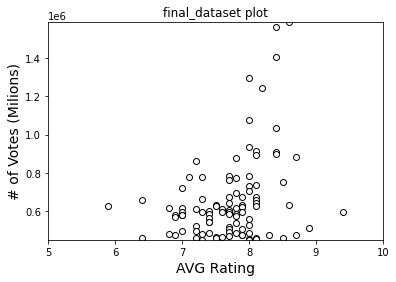

In [15]:
plt.scatter(final_dataset_KM['averageRating'],final_dataset_KM['numVotes'],  c='white', marker='o',edgecolor='black')
plt.title("final_dataset plot")
plt.xlabel("AVG Rating", size=14)
plt.ylabel("# of Votes (Milions)", size=14)

plt.xlim(5.0,10.0)
plt.ylim(451501,1585393)

plt.rcParams['figure.figsize'] = [13,10]

plt.show()

## Clustering with K-Means
The parameters choosen for the K-Means algorithm are:
* `n_clusters`; the number of clusters choosen is 3
* `init='random'`; the method for initialization in which it chooses n_clusters observations (rows) at random from data for the initial centroids.
* `n_init=100`; the number of time the k-means algorithm will be run with different centroid seeds.
* `max_iter=1000`; the maximum number of iterations of the k-means algorithm for a single run.

_Note_: the number of clusters choosen is totally arbitrary.

In [16]:
KM = KMeans(n_clusters=3, init='random', n_init=100, max_iter=1000)
KM.fit(final_dataset_KM)

KMeans(init='random', max_iter=1000, n_clusters=3, n_init=100)

In [17]:
clusters = KM.fit_predict(final_dataset_KM)
clusters

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

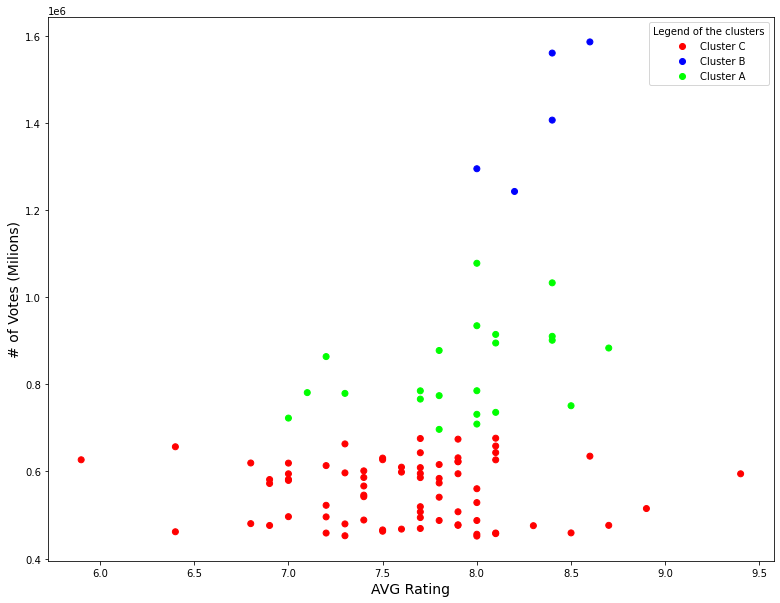

In [18]:
clusteredDataset = final_dataset.copy()
clusteredDataset['Clusters'] = clusters 

cl_labels = ['Cluster C', 'Cluster B', 'Cluster A']
cmap_name='MyColorMap'
colors_palette = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]

scatter = plt.scatter(
    clusteredDataset['averageRating'],
    clusteredDataset['numVotes'],
    c=clusteredDataset['Clusters'],
    cmap=LinearSegmentedColormap.from_list(cmap_name, colors_palette)
)

plt.xlabel("AVG Rating", size=14)
plt.ylabel("# of Votes (Milions)", size=14)
# add legend to the plot with names
plt.legend(handles=scatter.legend_elements()[0], 
           labels=cl_labels,
           title="Legend of the clusters")

# Export results of K-Means clustering 

In [71]:
clusteredDataset.to_excel("clusteredDataset_top100_2012_2021.xlsx",sheet_name='clustered_dataset')  